# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM NM1**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [3]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd  # Data processing and manipulation 
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization
import numpy as np  # Numerical operations and linear algebra 

# Libraries for data preparation and model building
from scipy.stats import norm  # Statistical functions
from sklearn.preprocessing import StandardScaler  # Data preprocessing
import warnings  # Warning handling
warnings.filterwarnings('ignore')  # Ignore warnings

# Display Matplotlib plots in Jupyter Notebook
%matplotlib inline  

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = '###'

#pd.set_option('max_columns', 100)
#pd.set_option('max_rows', 100)

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [4]:
df_train = pd.read_csv('df_train.csv') # load the train dataset, used the pandas read_csv() to import our dataset
df_test = pd.read_csv('df_test.csv') # load the test dataset, used the pandas read_csv() to import our dataset
#Preview the dataset


In [5]:
df_train.head(2) 

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0                1.0  ...       265.938000      281.013000   
1                0.0                1.0  ...       266.386667      280.561667   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  

[2 rows x 49 columns]

In [6]:
df_test.head(2)

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0        8763  2018-01-01 00:00:00           5.000000           level_8   
1        8764  2018-01-01 03:00:00           4.666667           level_8   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000              87.0        71.333333   
1             0.0             5.333333              89.0        78.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Barcelona_temp_max  \
0               20.0           3.000000  ...          287.816667   
1                0.0           3.666667  ...          284.816667   

   Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
0       280.816667      287.356667       276.150000       280.38   
1       280.483333      284.190000       277.816667       281.01   

   Barcelona_temp_min  Bilbao_temp_max Seville_temp_min  Madrid_temp  \
0          286.816667           285.15           283.15   279.866667   
1          283.483333           284.15           281.15   279.193333   

   Madrid_temp_min  
0           279.15  
1           278.15  

[2 rows x 48 columns]

We need to concatenate the two dataset for better predictability and also for the two dataset to be well alligned 

In [7]:
df = pd.concat([df_train,df_test])
df.tail(2)

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
2918       11681  2018-12-31 18:00:00           1.000000           level_6   
2919       11682  2018-12-31 21:00:00           1.333333          level_10   

      Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
2918             0.0             2.000000         52.666667        56.666667   
2919             0.0             2.333333         61.666667        69.333333   

      Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  \
2918                0.0           0.666667  ...       285.150000   
2919                0.0           1.333333  ...       276.816667   

      Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  \
2918      284.473333           280.15   281.626667          283.150000   
2919      281.133333           276.15   276.450000          278.483333   

      Bilbao_temp_max  Seville_temp_min Madrid_temp  Madrid_temp_min  \
2918       282.816667        287.483333  283.813333       282.150000   
2919       276.816667        283.816667  276.623333       276.483333   

      load_shortfall_3h  
2918                NaN  
2919                NaN  

[2 rows x 49 columns]

- We need to concatenate the two dataset for better predictability and also for the two dataset to be well alligned
- The concatenation process introduces null values within our dataset, this is due to the difference values in the two datasets. All nulls will be corrected via data imputation during model fitting.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


<b>Check the shape of the dataset</b>
- It is a good practise to first check the sape of the dataset so as to get a general overview of what our dataset is about.It provides initial insights and aids in data understanding, cleaning, preparation, and model implementation.

In [8]:
# print the shape
shape = df.shape
print('The shape of the dataset: ', shape)

The shape of the dataset:  (11683, 49)


Now we can see that the dataset contains <b>11683 instances </b>,  <b>48 variables</b> and <b>1 target</b> 
NB: The unnamed intial column contains the ID number of each observation which is negligible .

<b>Summary of the Dataset</b>

<b>Dataset description</b>
- The dataset contains several columns which holds data about the environmental atmospheric conditions of different cities within Spain; <b>(Madrid, Valencia, Seville, Bilbao and Barcelona)</b>.
- Showing the data repressentations of various weather and atmospheric conditions such as <b>Cloud, humidity, wind, rainfall, snow, temparature and pressure</b>
- It also contains both numerical and categorical data with data types ranging between float, integer and object data types.
- The first column without variable name is the observation_ID

<b>Important Points and Variable description of the Dataset</b><br>
<b>Features</b>
- time: Time at which the data was recorded
- {City Name}_wind_speed: The wind speed at a specific time interval for the named city.
- {City Name}_wind_degree: The strength of the wind for the named city at a specific time interval - expressed as a category.
- {City Name}_rain_1h: A metric expressing the amount of rain that has fallen in the past hour in a particular city.
- {City Name}_rain_3h:A metric expressing the amount of rain that has fallen in the past three hours in a particular city.
- {City Name}_humidity: The level of humidity as measured at the defined time for the specific city mentioned.
- {City Name}_clouds_all: The level of cloud coverage as measured at the specified point in time for the specific city mentioned.
- {City Name}_pressure: The atmospheric pressure for the named city at a specific time interval - expressed as a category.
- {City Name}_snow_3h: A metric expressing the amount of snow that has fallen in the past three hours in a particular city.
- {City Name}_weather_id: A metric used to explain the weather condition of a specific city at a specified time.
- {City Name}_temp_max: The maximum temperature for a specific city at a point in time.
- {City Name}_temp_min: The minimum temperature for a specific city at a point in time.
- {City Name}_temp: The average temperature for a specific city at a point in time.<br>

<b>Target Variable</b>
- load_shortfall_3h: The difference between the energy generated by the method of renewable energy sources, such as solar, wind, geothermal, etc., and energy generated with fossil fuels - partitioned in three-hour windows.

<b>Statiscal Properties of the Dataset</b>

- describe() provides a summary of descriptive statistics for a DataFrame.
- The output of df.describe() provides statistics such as count, mean, standard deviation, minimum, maximum, and various quantiles (25th percentile, 50th percentile, 75th percentile) for each numerical column in the DataFrame.
- This summary gives insights into the distribution of values in each numerical column, helping to understand the central tendency, spread, and range of the data.

In [9]:
# Statiscal Properties of the Dataset which helps us to view the Statiscal Properties of numerical variables in the dataset, it excludes character variables
df.describe()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count  11683.000000       11683.000000    11683.000000         11683.000000   
mean    5841.000000           2.433750        0.118698             2.692873   
std     3372.735932           1.831762        0.334918             2.321759   
min        0.000000           0.000000        0.000000             0.000000   
25%     2920.500000           1.000000        0.000000             1.000000   
50%     5841.000000           2.000000        0.000000             2.000000   
75%     8761.500000           3.333333        0.100000             3.666667   
max    11682.000000          13.333333        3.000000            52.000000   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count      11683.000000     11683.000000       11683.000000   
mean          63.774687        58.721818          43.440712   
std           22.219380        24.390621          32.046215   
min            8.333333         6.333333           0.000000   
25%           46.333333        38.000000          12.000000   
50%           67.000000        59.333333          45.000000   
75%           83.000000        80.000000          75.000000   
max          100.000000       100.000000         100.000000   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  ...  \
count       11683.000000        11683.000000     11683.000000  ...   
mean            1.958629           14.155268       159.878855  ...   
std             1.696043           24.541321       101.005654  ...   
min             0.000000            0.000000         0.000000  ...   
25%             1.000000            0.000000        76.666667  ...   
50%             1.333333            0.000000       145.666667  ...   
75%             2.666667           20.000000       233.333333  ...   
max            12.666667           97.333333       360.000000  ...   

       Madrid_temp_max  Barcelona_temp  Bilbao_temp_min   Bilbao_temp  \
count     11683.000000    11683.000000     11683.000000  11683.000000   
mean        289.377372      289.869413       284.993657    286.447784   
std           9.594562        6.680538         6.730076      6.738466   
min         264.983333      270.816667       264.483333    267.483333   
25%         282.150000      284.816667       280.122526    281.483448   
50%         287.843333      289.426667       284.816667    286.193333   
75%         296.483333      295.150000       289.816667    291.040000   
max         314.483333      308.150000       309.816667    310.710000   

       Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min   Madrid_temp  \
count        11683.000000     11683.000000      11683.000000  11683.000000   
mean           288.616766       288.095397        291.263219    288.282055   
std              6.391989         6.898601          8.136234      9.258559   
min            269.483333       269.063000        270.150000    264.983333   
25%            284.150000       283.150000        285.483333    281.250000   
50%            288.276333       287.816667        290.382000    286.923333   
75%            293.483333       292.483333        296.641333    294.993167   
max            306.816667       317.966667        314.816667    313.133333   

       Madrid_temp_min  load_shortfall_3h  
count     11683.000000        8763.000000  
mean        287.056222       10673.857612  
std           9.093455        5218.046404  
min         264.983333       -6618.000000  
25%         280.150000        7390.333333  
50%         285.816667       11114.666667  
75%         293.708917       14498.166667  
max         310.383333       31904.000000  

[8 rows x 46 columns]

In [10]:
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

# Data Cleaning

In [11]:
df_clean = df_train
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

<b>Check for Duplicated variables and instances</b>
- This code checks if the entire set of values in a column has been seen before and keeps columns where all the values are unique across the DataFrame.
- This method checks for unique columns based on the entirety of their values

In [12]:
# Create a set to keep track of seen column values
seen_values = set()

# Create a list to store columns to keep
columns_to_keep = []

for column in df.columns:
    column_values = df[column].values
    column_tuple = tuple(column_values)

    if column_tuple not in seen_values:
        seen_values.add(column_tuple)
        columns_to_keep.append(column)

# Create a new DataFrame with only the columns to keep
df_clean = df[columns_to_keep]

- This code below is used to verify that all the duplicates were removed and from these outputs, it verifies that there are no duplicates

In [13]:
df_clean.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2915    False
2916    False
2917    False
2918    False
2919    False
Length: 11683, dtype: bool

In [14]:
df_clean.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0           1.000000  ...       265.938000      281.013000   
1                0.0           1.000000  ...       266.386667      280.561667   
2                0.0           1.000000  ...       272.708667      281.583667   
3                0.0           1.000000  ...       281.895219      283.434104   
4                2.0           0.333333  ...       280.678437      284.213167   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   
3       281.135063   281.135063          283.434104       281.135063   
4       282.252063   282.252063          284.213167       282.252063   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  
2        278.792000  272.708667       272.708667        4274.666667  
3        285.394000  281.895219       281.895219        5075.666667  
4        285.513719  280.678437       280.678437        6620.666667  

[5 rows x 49 columns]

<b> Checking for Null values</b>

- The code below checks for the count of null or missing values in each column of the df_clean. It helps in identifying the number of missing values present in each column.
- The output will display the number of null values in each column of df_clean. This is helpful for assessing the data quality and deciding how to handle missing values in the dataset.
- The output indicate that we have 2522 nulls in Valencia_pressure column, and also in the target column(load_shortfall_3h). The null on load_shortfall_3h are from the test dataframe because are the values the model is supposed to predict

In [15]:
df_clean.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

- <b>Correcting for missing values in the predictor variables</b>
- <b>Converting the variables into numeric data types</b>

In [16]:
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [17]:
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])
df_clean['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: int64

In [18]:
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)')
df_clean['Seville_pressure'] = pd.to_numeric(df_clean['Seville_pressure'])
df_clean['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: int64

In [19]:
df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean['Year'] = df_clean['time'].dt.year
df_clean['Month'] = df_clean['time'].dt.month
df_clean['Day'] = df_clean['time'].dt.day
df_clean['Hour'] = df_clean['time'].dt.hour
df_clean['Minute'] = df_clean['time'].dt.minute
df_clean['Second'] = df_clean['time'].dt.second
df_clean['TimeNumeric'] = df_clean['time'].dt.hour * 60 + df_clean['time'].dt.minute

In [20]:
df_clean.shape

(11683, 56)

<b>DROPPING NOISE</b>

- Removing irrelevant or unwanted information, which could be erroneous or misleading.

In [21]:
df_clean = df_clean.drop(['time', 'Unnamed: 0'], axis=1)

In [22]:
df_clean.tail()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  \
2915           0.333333                  9             0.0   
2916           0.333333                  8             0.0   
2917           1.000000                  6             0.0   
2918           1.000000                  6             0.0   
2919           1.333333                 10             0.0   

      Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
2915             2.000000         81.666667        49.666667   
2916             1.333333         61.000000        28.333333   
2917             3.000000         47.000000        26.333333   
2918             2.000000         52.666667        56.666667   
2919             2.333333         61.666667        69.333333   

      Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
2915          80.000000           1.333333                 0.0   
2916          56.666667           1.000000                 0.0   
2917           0.000000           0.666667                 0.0   
2918           0.000000           0.666667                 0.0   
2919           0.000000           1.333333                 0.0   

      Bilbao_wind_deg  ...  Madrid_temp  Madrid_temp_min  load_shortfall_3h  \
2915        70.000000  ...   274.910000       271.150000                NaN   
2916        36.666667  ...   283.156667       280.483333                NaN   
2917        14.666667  ...   287.733333       286.483333                NaN   
2918        19.000000  ...   283.813333       282.150000                NaN   
2919       120.000000  ...   276.623333       276.483333                NaN   

      Year  Month  Day  Hour  Minute  Second  TimeNumeric  
2915  2018     12   31     9       0       0          540  
2916  2018     12   31    12       0       0          720  
2917  2018     12   31    15       0       0          900  
2918  2018     12   31    18       0       0         1080  
2919  2018     12   31    21       0       0         1260  

[5 rows x 54 columns]

In [23]:
df_clean.columns

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madri

- <b> Rearranging the order of the columns after adding new features into the data set </b>


In [24]:
column_order = ['Year', 'Month', 'Day', 'Hour','TimeNumeric', 
                #'Minute', 'Second', 
        'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min',
       'load_shortfall_3h'] # Define the dsired order of column

dataframe = df_clean[column_order]

In [25]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  11683 non-null  int64  
 1   Month                 11683 non-null  int64  
 2   Day                   11683 non-null  int64  
 3   Hour                  11683 non-null  int64  
 4   TimeNumeric           11683 non-null  int64  
 5   Madrid_wind_speed     11683 non-null  float64
 6   Valencia_wind_deg     11683 non-null  int64  
 7   Bilbao_rain_1h        11683 non-null  float64
 8   Valencia_wind_speed   11683 non-null  float64
 9   Seville_humidity      11683 non-null  float64
 10  Madrid_humidity       11683 non-null  float64
 11  Bilbao_clouds_all     11683 non-null  float64
 12  Bilbao_wind_speed     11683 non-null  float64
 13  Seville_clouds_all    11683 non-null  float64
 14  Bilbao_wind_deg       11683 non-null  float64
 15  Barcelona_wind_speed

In [26]:
dataframe.shape

(11683, 52)

In [27]:
dataframe.describe()

Year         Month           Day          Hour   TimeNumeric  \
count  11683.000000  11683.000000  11683.000000  11683.000000  11683.000000   
mean    2016.500300      6.525122     15.735256     10.498844    629.930668   
std        1.117584      3.447945      8.798064      6.873990    412.439372   
min     2015.000000      1.000000      1.000000      0.000000      0.000000   
25%     2016.000000      4.000000      8.000000      4.500000    270.000000   
50%     2016.000000      7.000000     16.000000      9.000000    540.000000   
75%     2017.000000     10.000000     23.000000     15.000000    900.000000   
max     2018.000000     12.000000     31.000000     21.000000   1260.000000   

       Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  \
count       11683.000000       11683.000000    11683.000000   
mean            2.433750           5.476590        0.118698   
std             1.831762           2.863384        0.334918   
min             0.000000           1.000000        0.000000   
25%             1.000000           3.000000        0.000000   
50%             2.000000           5.000000        0.000000   
75%             3.333333           8.000000        0.100000   
max            13.333333          10.000000        3.000000   

       Valencia_wind_speed  Seville_humidity  ...  Madrid_temp_max  \
count         11683.000000      11683.000000  ...     11683.000000   
mean              2.692873         63.774687  ...       289.377372   
std               2.321759         22.219380  ...         9.594562   
min               0.000000          8.333333  ...       264.983333   
25%               1.000000         46.333333  ...       282.150000   
50%               2.000000         67.000000  ...       287.843333   
75%               3.666667         83.000000  ...       296.483333   
max              52.000000        100.000000  ...       314.483333   

       Barcelona_temp  Bilbao_temp_min   Bilbao_temp  Barcelona_temp_min  \
count    11683.000000     11683.000000  11683.000000        11683.000000   
mean       289.869413       284.993657    286.447784          288.616766   
std          6.680538         6.730076      6.738466            6.391989   
min        270.816667       264.483333    267.483333          269.483333   
25%        284.816667       280.122526    281.483448          284.150000   
50%        289.426667       284.816667    286.193333          288.276333   
75%        295.150000       289.816667    291.040000          293.483333   
max        308.150000       309.816667    310.710000          306.816667   

       Bilbao_temp_max  Seville_temp_min   Madrid_temp  Madrid_temp_min  \
count     11683.000000      11683.000000  11683.000000     11683.000000   
mean        288.095397        291.263219    288.282055       287.056222   
std           6.898601          8.136234      9.258559         9.093455   
min         269.063000        270.150000    264.983333       264.983333   
25%         283.150000        285.483333    281.250000       280.150000   
50%         287.816667        290.382000    286.923333       285.816667   
75%         292.483333        296.641333    294.993167       293.708917   
max         317.966667        314.816667    313.133333       310.383333   

       load_shortfall_3h  
count        8763.000000  
mean        10673.857612  
std          5218.046404  
min         -6618.000000  
25%          7390.333333  
50%         11114.666667  
75%         14498.166667  
max         31904.000000  

[8 rows x 52 columns]

In [28]:
print("Kurtosis: %f" % dataframe['load_shortfall_3h'].kurt())
print("Skewness: %f" % dataframe['load_shortfall_3h'].skew())
dataframe.skew()

Kurtosis: -0.118999
Skewness: -0.384847


Year                     0.000169
Month                   -0.009772
Day                      0.006368
Hour                     0.000539
TimeNumeric              0.000539
Madrid_wind_speed        1.452792
Valencia_wind_deg        0.002434
Bilbao_rain_1h           5.694539
Valencia_wind_speed      3.116352
Seville_humidity        -0.366033
Madrid_humidity         -0.076590
Bilbao_clouds_all       -0.068335
Bilbao_wind_speed        1.602522
Seville_clouds_all       1.765104
Bilbao_wind_deg          0.246848
Barcelona_wind_speed     1.072417
Barcelona_wind_deg      -0.140337
Madrid_clouds_all        1.158486
Seville_wind_speed       1.213437
Barcelona_rain_1h        9.833191
Seville_pressure         0.032323
Seville_rain_1h          7.535944
Bilbao_snow_3h          30.237039
Barcelona_pressure      66.949053
Seville_rain_3h         22.349167
Madrid_rain_1h           6.446514
Barcelona_rain_3h       14.668923
Valencia_snow_3h        73.090853
Madrid_weather_id       -2.909054
Barcelona_weat

<b>Interpretation</b><br>
- From observation, we can see that <b>Madrid_wind_speed, Valencia_wind_speed, Bilbao_wind_speed, Seville_clouds_all, Madrid_clouds_all, Seville_wind_speed, Barcelona_pressure</b> and <b>Barcelona_wind_speed</b> are highly positively skewed.

- The features <b>Madrid_weather_id, Barcelona_weather_id, Seville_weather_id, Madrid_pressure</b> and <b>Bilbao_weather_id</b> 

- The feature <b>Bilbao_pressure</b> is moderately skewed in a negative direction

- The features <b>Seville_humidity, Bilbao_wind_deg, Barcelona_temp_max, Madrid_temp_max, Barcelona_temp, Bilbao_temp_min,  Bilbao_temp, Bilbao_temp_max, Seville_temp_min, Madrid_temp</b> and <b>Madrid_temp_min</b> are Fairly Symmetrical 

<b>Create a distribution plot for the column 'load_shortfall_3h'</b>

- This code below generates a histogram that displays the distribution of values in the 'load_shortfall_3h' column and fits a kernel density estimation (KDE) curve over the histogram to represent the underlying probability density function of the data.

<Axes: xlabel='load_shortfall_3h', ylabel='Density'>

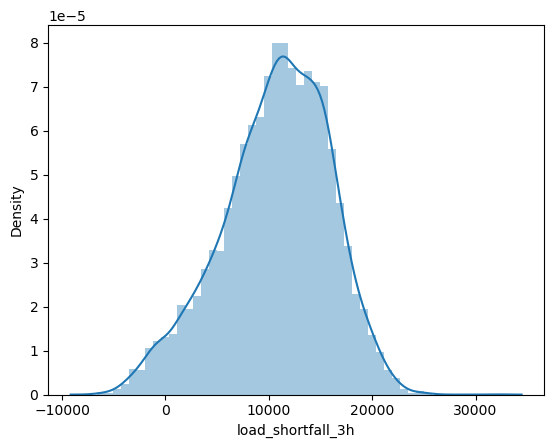

In [29]:
sns.distplot(dataframe['load_shortfall_3h'])

<b>We can deduce from the chart that</b>;
- Does not deviate from the normal distribution, has a gradual distribution for the indpendent variable observations
- Have appreciable symmetrical skewness.
- Show peakedness.

<b> UNIVARIATE ANALYSIS </b>

- The histogram and density plot should diplay the same information if same features where used,the density plot can be considered a smoothed version of the histogram and does not depend on the size of bins. But in this case it would not because we are trying to see the interaction of bith rain and temp of load_shortfall_3h.
- Displaying whether they have a positive or negative interaction with our response variable.

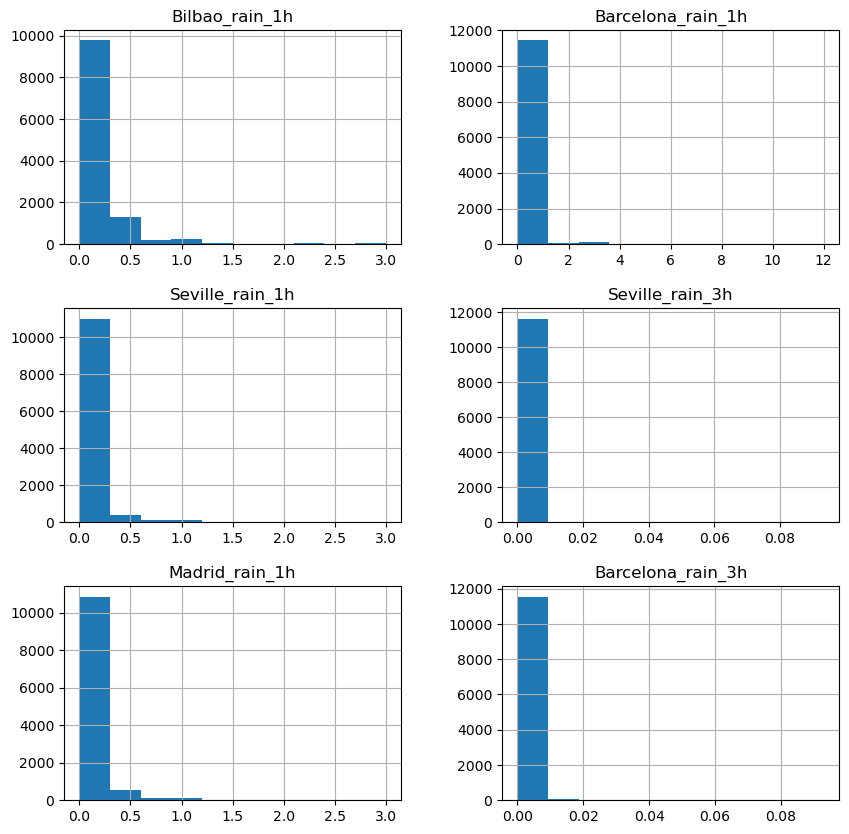

In [29]:
rain_predictors = [col for col in df.columns if 'rain' in col] # create a list of all numerical features
dataframe[rain_predictors].hist(figsize=(10,10));

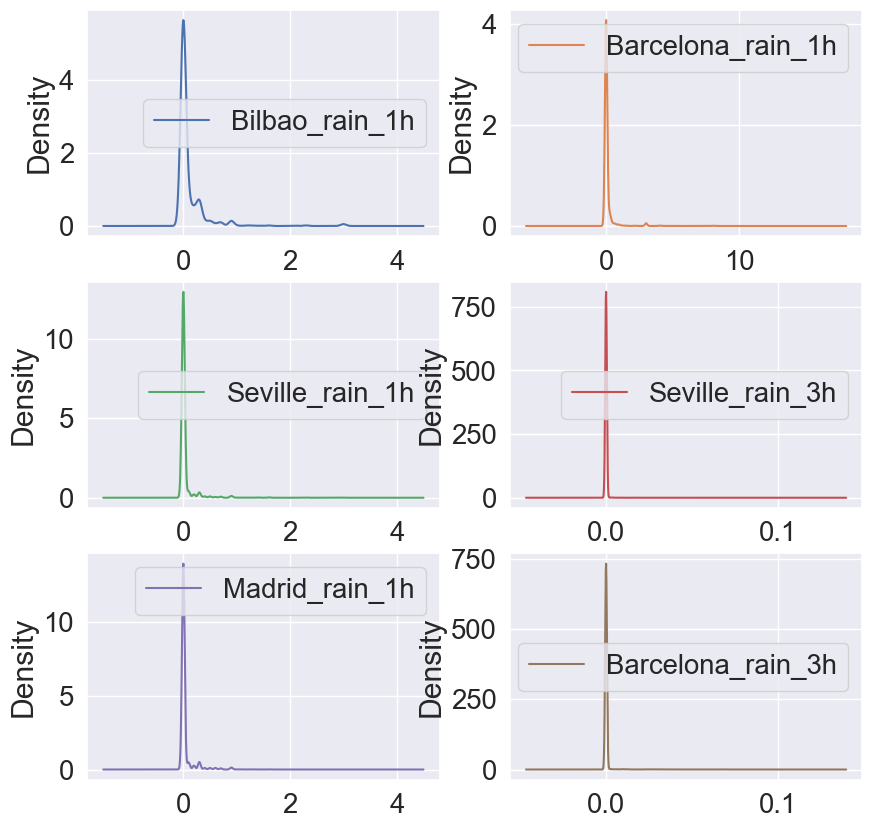

In [33]:
#temp_features = [col for col in df.columns if 'temp' in col]
dataframe[rain_predictors].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

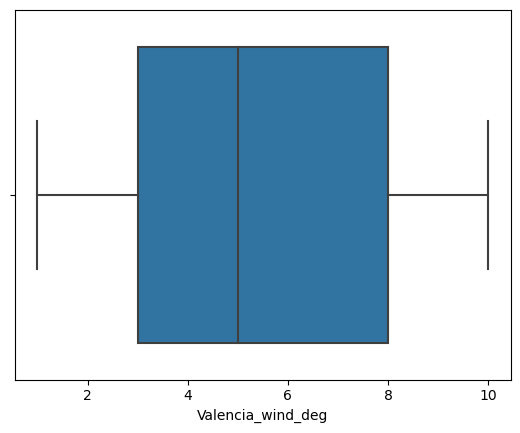

In [30]:
sns.boxplot(x='Valencia_wind_deg', data=dataframe);

<b>MULTIVARIATE ANALYSIS</b>

- The code computes the correlation matrix for the dataframe using the corr() method.
- This correlation matrix shows the pairwise correlations between all the numerical columns in the DataFrame.

In [31]:
correlation = dataframe.corr()
correlation

Year     Month       Day      Hour  TimeNumeric  \
Year                  1.000000 -0.000452 -0.001320  0.000226     0.000226   
Month                -0.000452  1.000000  0.009592  0.000226     0.000226   
Day                  -0.001320  0.009592  1.000000  0.000214     0.000214   
Hour                  0.000226  0.000226  0.000214  1.000000     1.000000   
TimeNumeric           0.000226  0.000226  0.000214  1.000000     1.000000   
Madrid_wind_speed    -0.011580 -0.235733 -0.038722  0.188118     0.188118   
Valencia_wind_deg     0.062176 -0.109152 -0.025827 -0.171907    -0.171907   
Bilbao_rain_1h       -0.191407 -0.177464  0.057068  0.039779     0.039779   
Valencia_wind_speed   0.054423 -0.233550 -0.009837  0.212418     0.212418   
Seville_humidity      0.041900 -0.087993  0.024934 -0.432221    -0.432221   
Madrid_humidity       0.025770 -0.063884  0.016621 -0.313369    -0.313369   
Bilbao_clouds_all    -0.018802 -0.136215  0.028425 -0.022151    -0.022151   
Bilbao_wind_speed     0.130914 -0.096566 -0.029415  0.206420     0.206420   
Seville_clouds_all   -0.024476 -0.147646 -0.014268 -0.017705    -0.017705   
Bilbao_wind_deg      -0.045667 -0.165337  0.024520  0.143949     0.143949   
Barcelona_wind_speed -0.172568 -0.071538 -0.004093  0.191400     0.191400   
Barcelona_wind_deg   -0.129145  0.056530 -0.021121 -0.181017    -0.181017   
Madrid_clouds_all     0.011233 -0.093097 -0.003460  0.025622     0.025622   
Seville_wind_speed    0.015695 -0.128386 -0.023455  0.269876     0.269876   
Barcelona_rain_1h    -0.093252 -0.026419  0.019663  0.009500     0.009500   
Seville_pressure     -0.203106 -0.006831  0.008805 -0.061268    -0.061268   
Seville_rain_1h      -0.016533 -0.064958 -0.004364  0.015112     0.015112   
Bilbao_snow_3h       -0.066386 -0.065490 -0.047709  0.020975     0.020975   
Barcelona_pressure   -0.029817 -0.028947  0.013760 -0.007980    -0.007980   
Seville_rain_3h      -0.068520 -0.047824  0.003701  0.009426     0.009426   
Madrid_rain_1h        0.020083 -0.075091  0.006654  0.063648     0.063648   
Barcelona_rain_3h    -0.098703 -0.049005 -0.019068  0.003138     0.003138   
Valencia_snow_3h     -0.020128 -0.019678 -0.019952 -0.001179    -0.001179   
Madrid_weather_id    -0.046348  0.059657 -0.009348 -0.045798    -0.045798   
Barcelona_weather_id -0.004901  0.025324 -0.013184  0.000702     0.000702   
Bilbao_pressure      -0.050296  0.046454  0.008041 -0.013322    -0.013322   
Seville_weather_id    0.011170  0.096098  0.000076  0.018749     0.018749   
Valencia_pressure     0.141572  0.109583 -0.035577 -0.025935    -0.025935   
Seville_temp_max     -0.234904  0.201311 -0.012772  0.246514     0.246514   
Madrid_pressure       0.291251  0.247235 -0.018110 -0.012044    -0.012044   
Valencia_temp_max     0.015075  0.213760 -0.002150  0.256799     0.256799   
Valencia_temp         0.073951  0.214722 -0.001224  0.272844     0.272844   
Bilbao_weather_id     0.122811  0.151826 -0.007174  0.026548     0.026548   
Seville_temp         -0.151119  0.224983 -0.010118  0.326059     0.326059   
Valencia_humidity    -0.029345  0.188156  0.049875 -0.349312    -0.349312   
Valencia_temp_min     0.133934  0.213168  0.001022  0.282792     0.282792   
Barcelona_temp_max   -0.038048  0.235534 -0.004527  0.193930     0.193930   
Madrid_temp_max      -0.004701  0.202973  0.004298  0.283683     0.283683   
Barcelona_temp        0.003475  0.216035 -0.003606  0.218456     0.218456   
Bilbao_temp_min      -0.025867  0.208299  0.003607  0.271493     0.271493   
Bilbao_temp           0.006234  0.246352  0.005728  0.264344     0.264344   
Barcelona_temp_min    0.063752  0.184902 -0.002441  0.238515     0.238515   
Bilbao_temp_max       0.057319  0.281461  0.005398  0.249177     0.249177   
Seville_temp_min     -0.078447  0.221140 -0.006847  0.352601     0.352601   
Madrid_temp          -0.003341  0.196907  0.009484  0.284658     0.284658   
Madrid_temp_min      -0.002204  0.178560  0.026238  0.258025     0.258025   
load_shortfall_3h     

The <b>load_shortfall_3h</b> variable is target. So, we should check how each attribute correlates with the target variable. We can do it as follows:-

- The code below will output a series that shows the correlation values between the 'load_shortfall_3h' column and all other columns in the DataFrame.
- Positive values indicate a positive correlation, negative values indicate a negative correlation, and values closer to 0 suggest a weaker linear relationship between the variables

In [32]:
corrs = correlation['load_shortfall_3h'].sort_values(ascending=False)
corrs

load_shortfall_3h       1.000000
Valencia_temp_min       0.201863
Month                   0.199048
Barcelona_temp_min      0.195984
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
Hour                    0.139285
TimeNumeric             0.139285
Year                    0.131324
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Day                     0.092116
Valencia_pressure       0.090405
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Valencia_snow_3h       -0.021633
Barcelona_

- Understanding these correlations can help in feature selection and feature engineering by identifying which features might be more relevant in predicting the target variable. Features with higher correlation values with the target might be more important for modeling.

<b>Heat Map</b>

- Provides a clear and concise representation of the correlation matrix.
- The heatmap can help identify which features are more strongly correlated with the target variable.
 

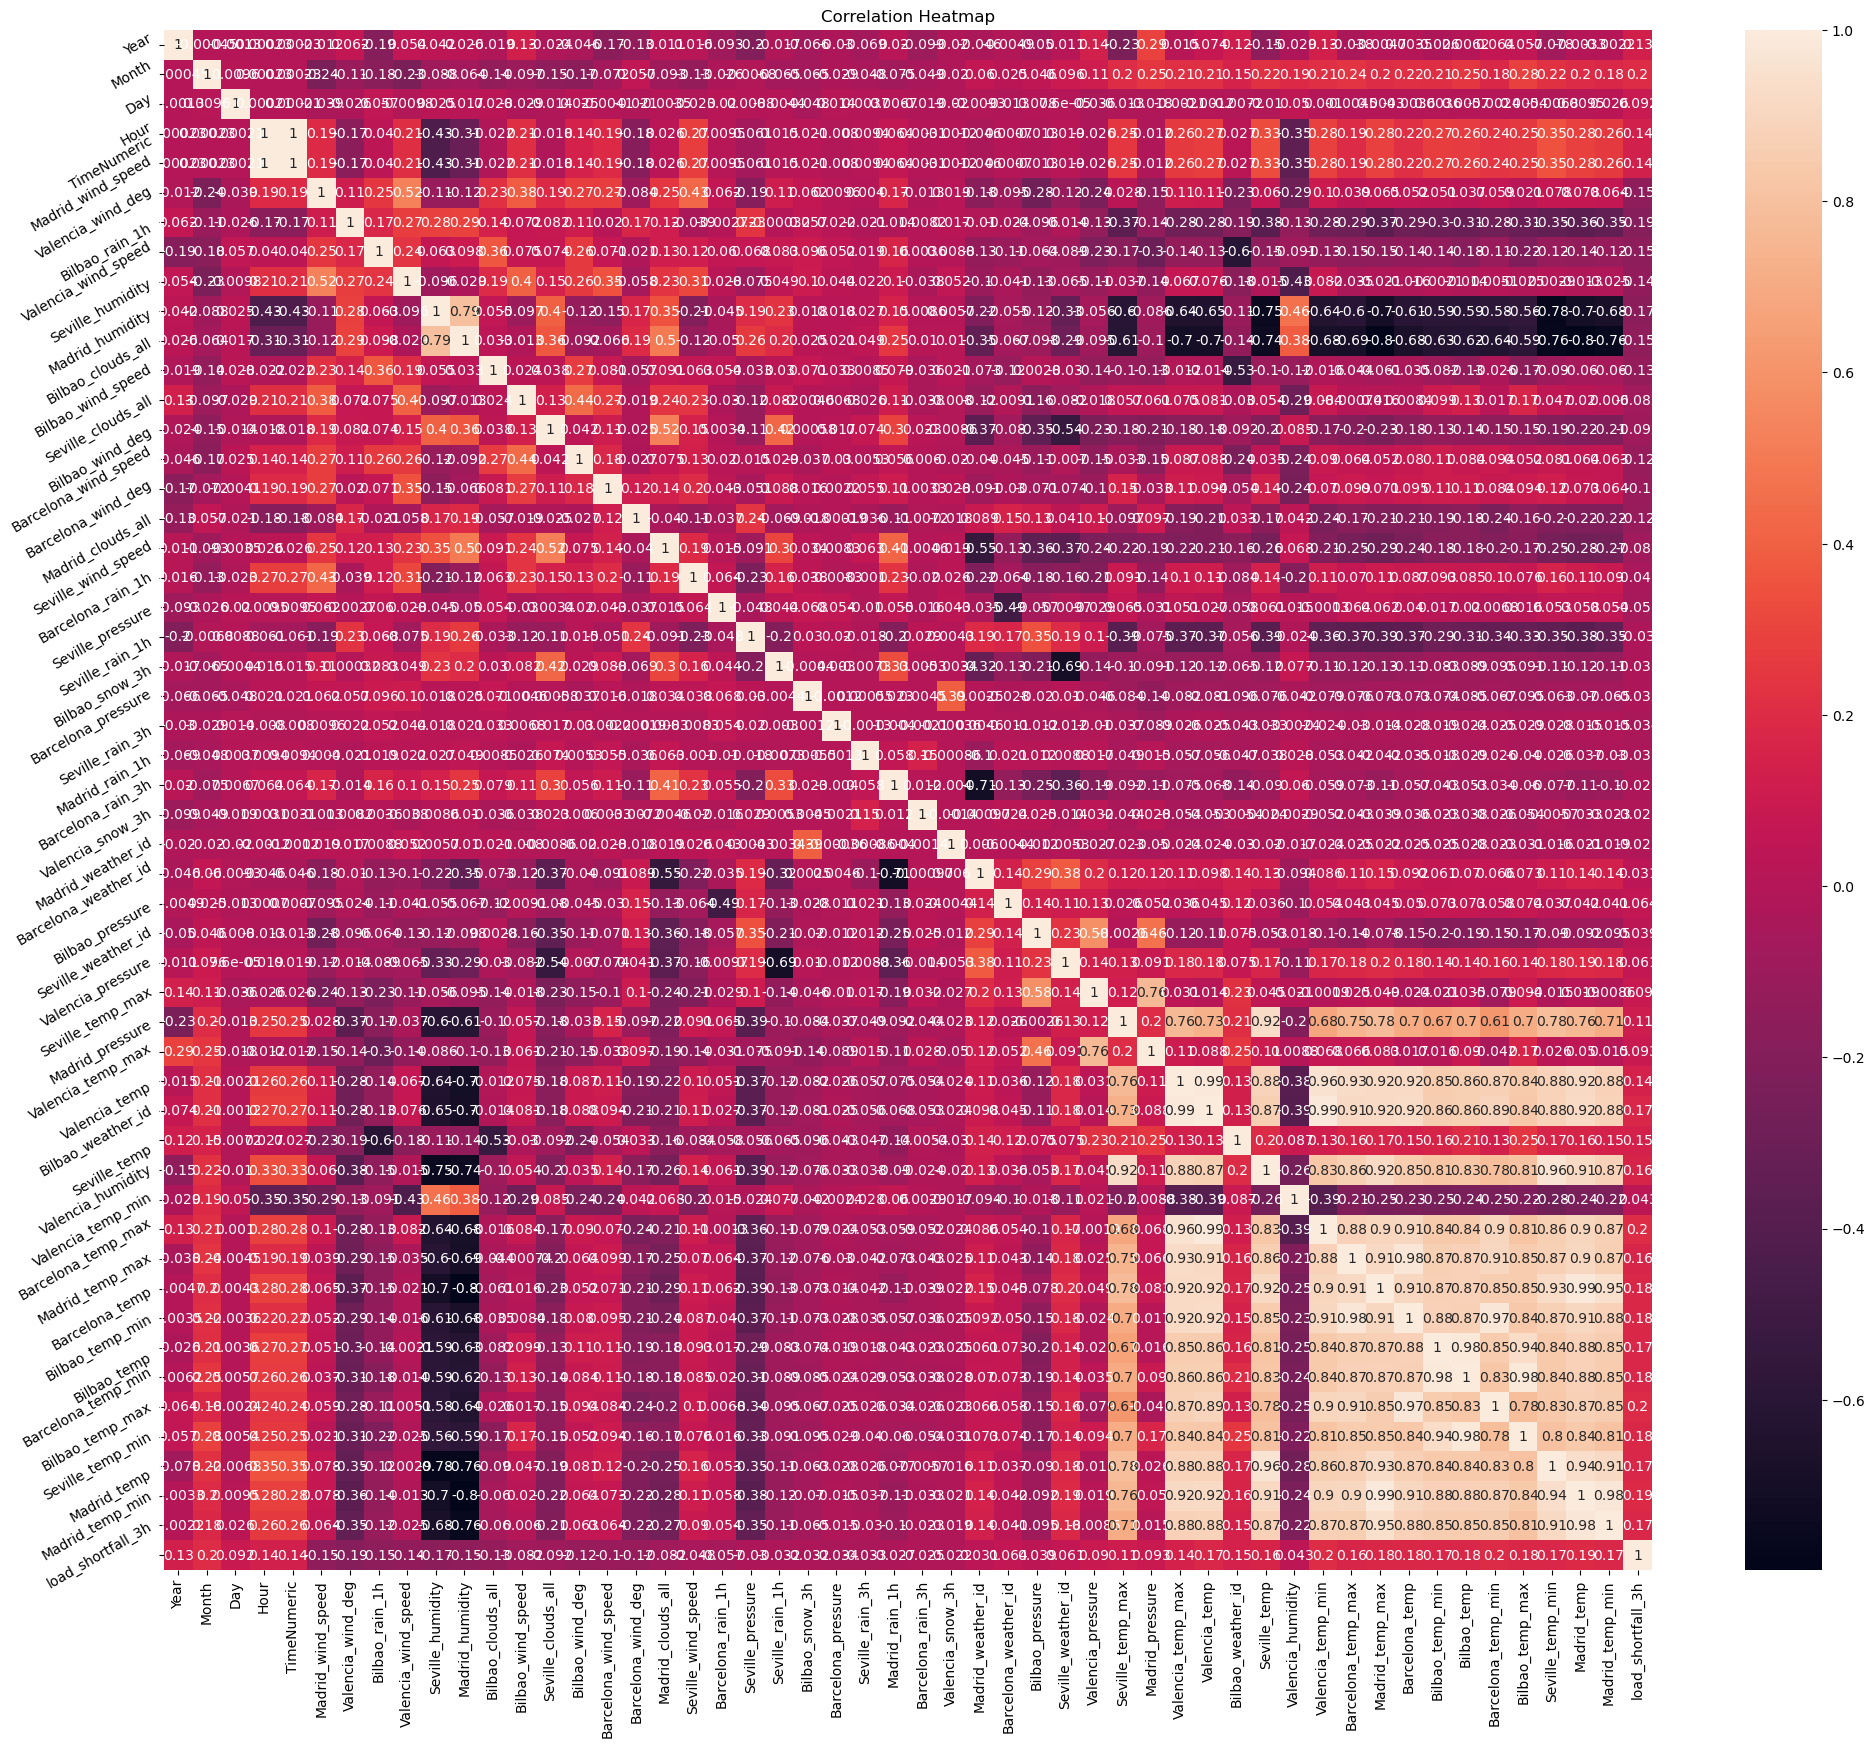

In [33]:
plt.figure(figsize=(24,20))
plt.title('Correlation Heatmap')
heatmap = sns.heatmap(correlation, annot=True, linecolor='white')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30)           
plt.show()

<b>Interpretation From the above correlation heat map, we can conclude that :- (Using Pearson Correlation Coefficient) </b>

- The correlation coefficient ranges from -1 to +1.
<br><br>
- When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is no variable which has strong positive correlation with target variable.
<br><br>
- When it is clsoe to -1, it means that there is a strong negative correlation. So, we can see that there is no variable which has strong negative correlation with target variable.
<br><br>
- When it is close to 0, it means that there is no linear correlation. So, there is no correlation between the target and some of the independent variables, they are; <b>Madrid_pressure, Barcelona_weather_id, Seville_weather_id, Valencia_humidity, Bilbao_pressure, Madrid_weather_id, Barcelona_pressure, Seville_wind_speed, Bilbao_wind_speed, Madrid_clouds_all</b> and <b>Seville_clouds_all</b> 
<br>   <br>
- We can see that <b>Valencia_temp_min, Barcelona_temp_min, Madrid_temp, Barcelona_temp, Madrid_temp_max, Bilbao_temp_max , Bilbao_temp, Madrid_temp_min, Seville_temp_min, Valencia_temp, Bilbao_temp_min, Barcelona_temp_max, Seville_temp, Bilbao_weather_id, Valencia_temp_max </b> and <b>Seville_temp_max</b> have weak positive correlation with target variable
<br><br>
- We can also see that <b>Barcelona_wind_speed, Barcelona_wind_deg, Bilbao_wind_deg, Bilbao_clouds_all, Valencia_wind_speed, Madrid_humidity, Madrid_wind_speed</b> and <b>Seville_humidity</b> have weak negative correlation with target variable.

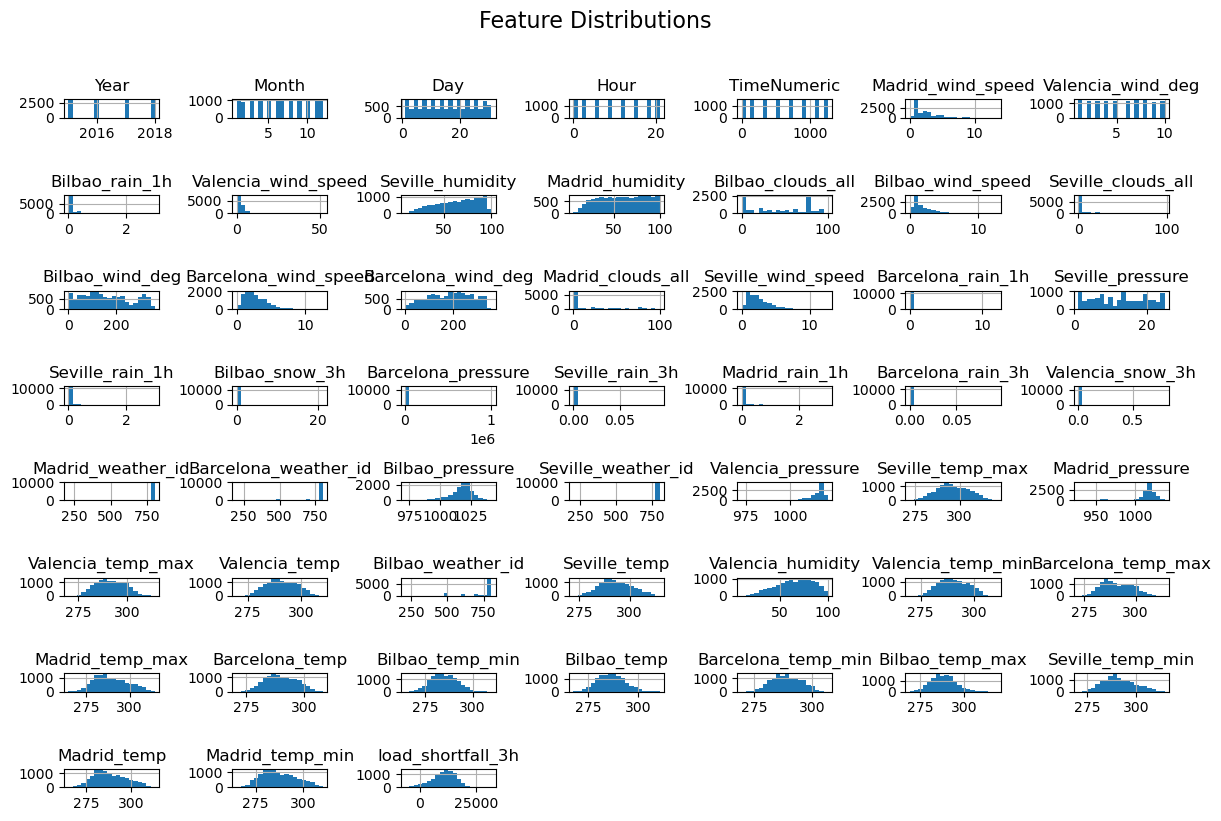

In [39]:
# have a look at feature distributions
# Plot histograms for all numeric columns
dataframe.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

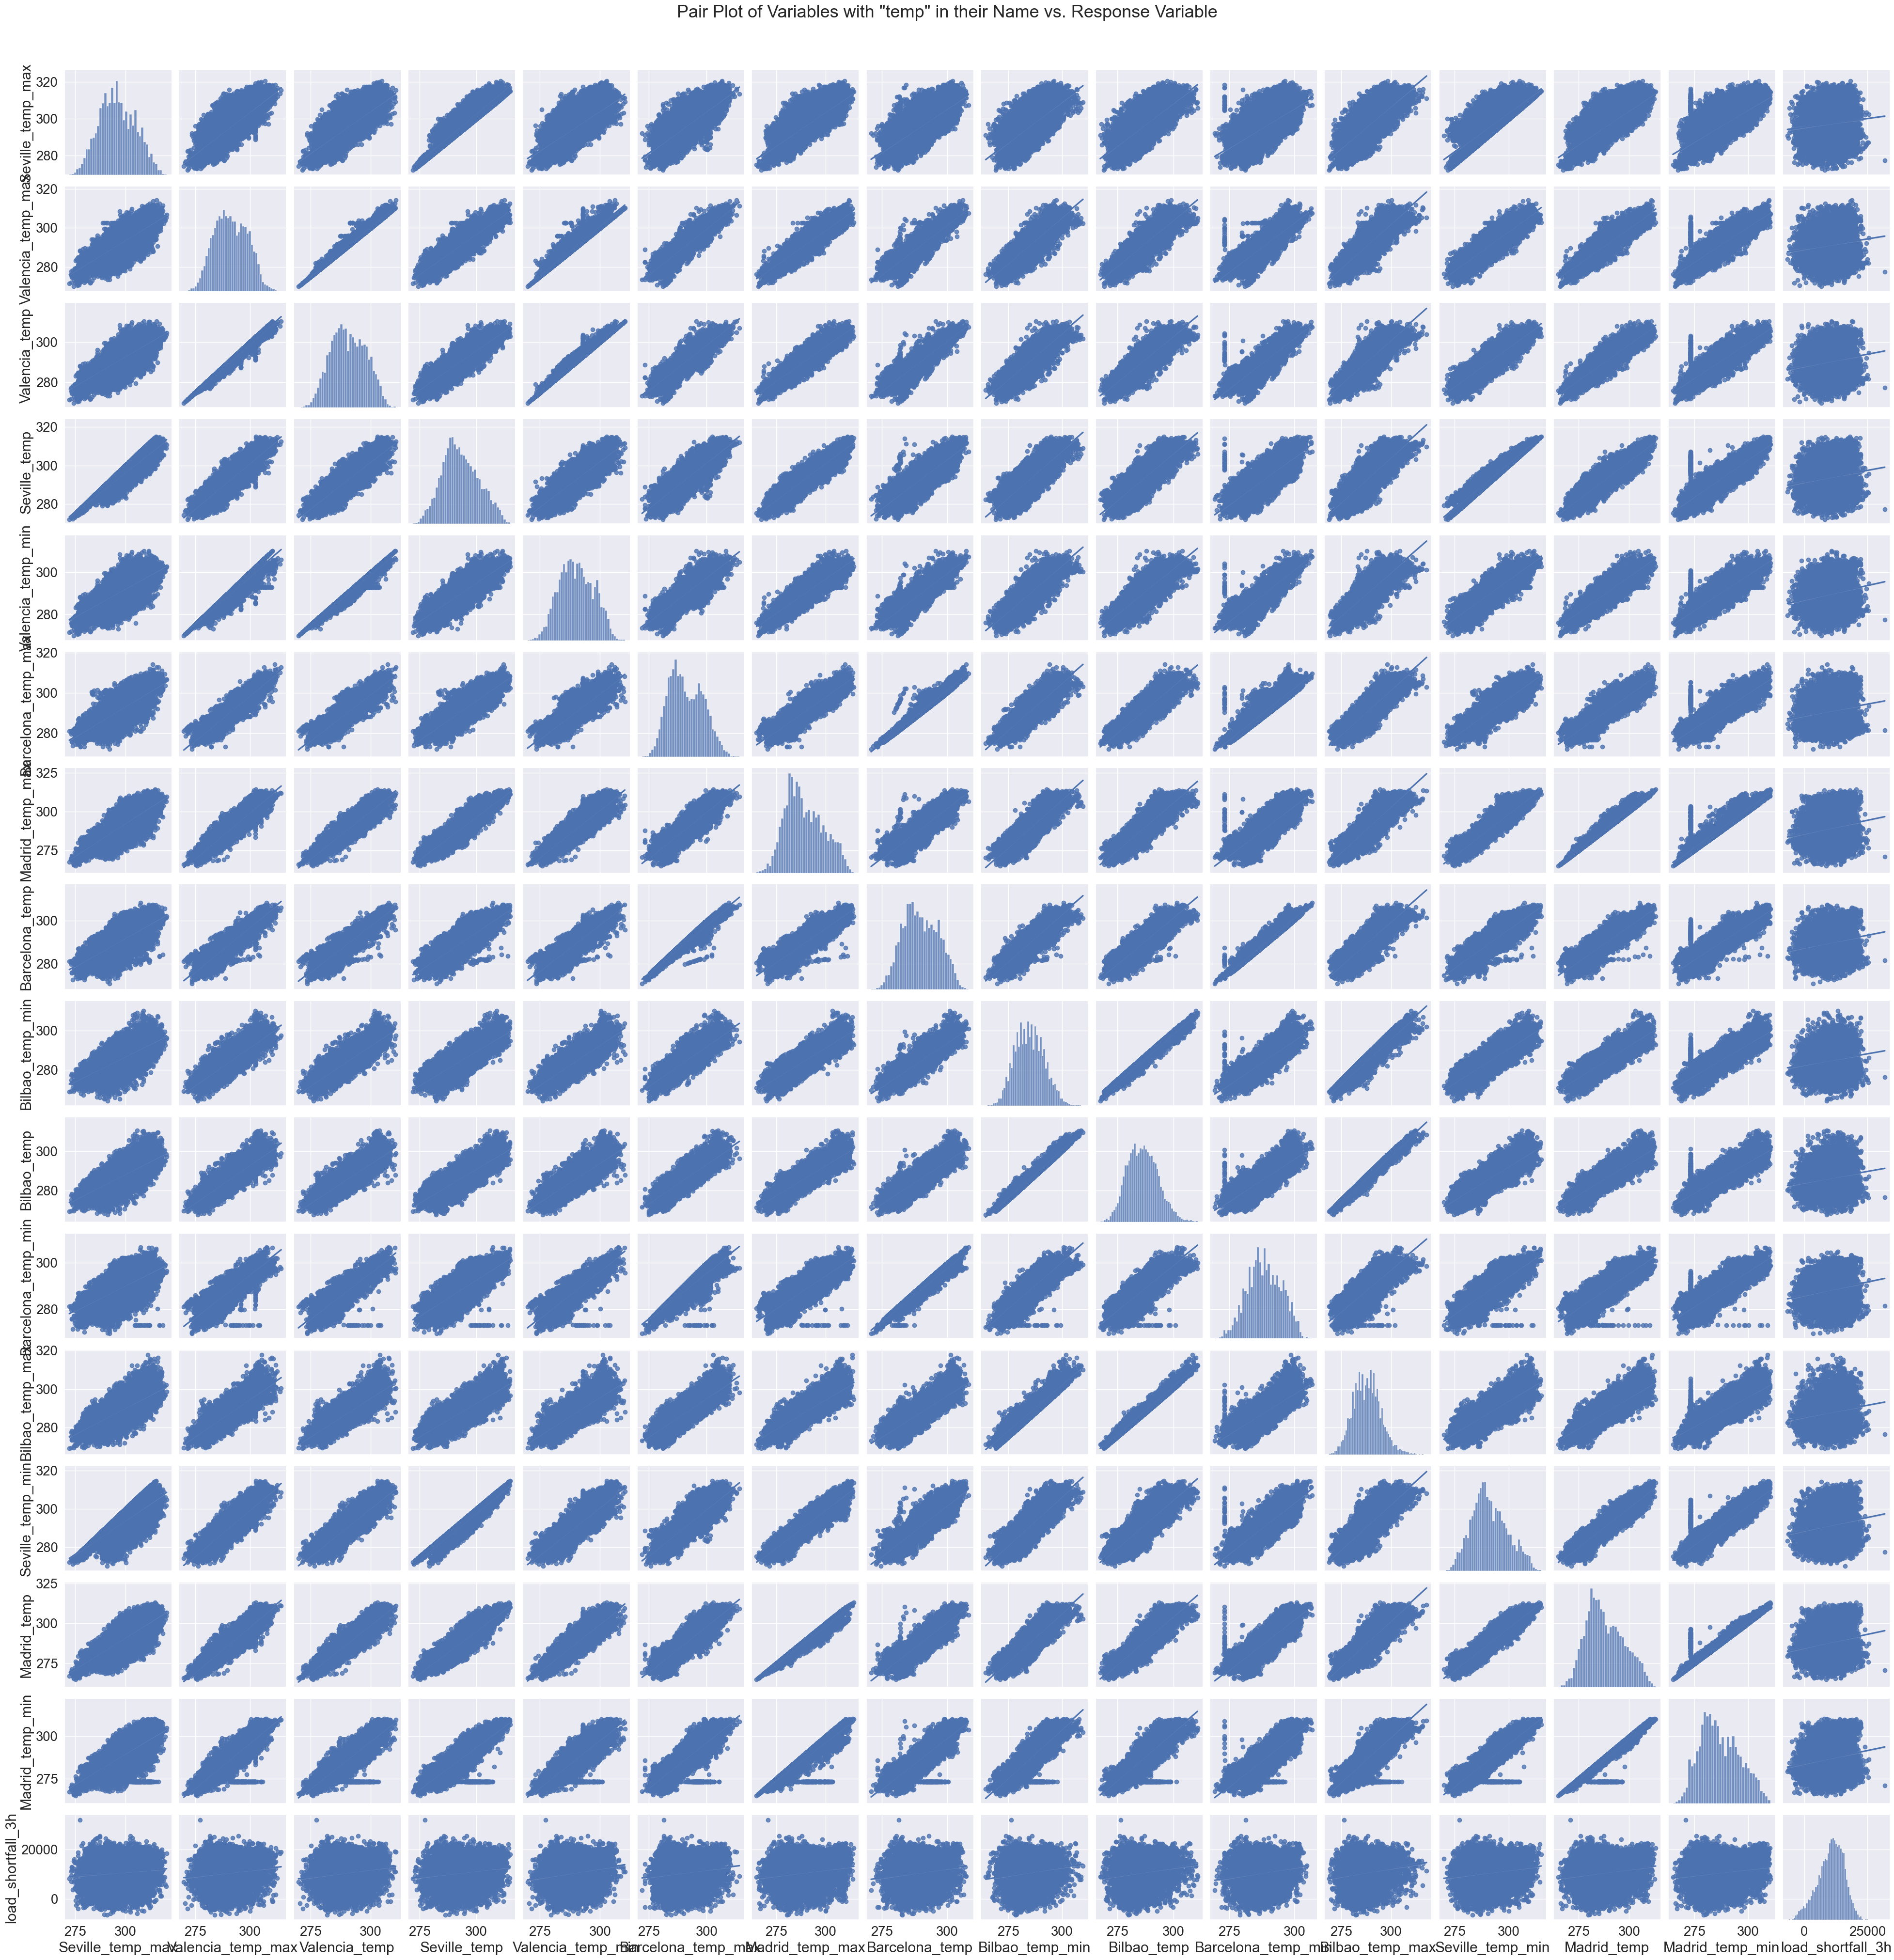

In [40]:
response_variable = 'load_shortfall_3h'

# Filter columns that contain the word "temp"
temp_columns = [col for col in dataframe.columns if 'temp' in col]

# Combine the selected columns and the response variable
selected_columns = temp_columns + [response_variable]

# Create a pair plot with regression lines
sns.set(font_scale=1.8)
sns.pairplot(df[selected_columns], kind='reg')
plt.suptitle('Pair Plot of Variables with "temp" in their Name vs. Response Variable', y=1.02)
plt.show()

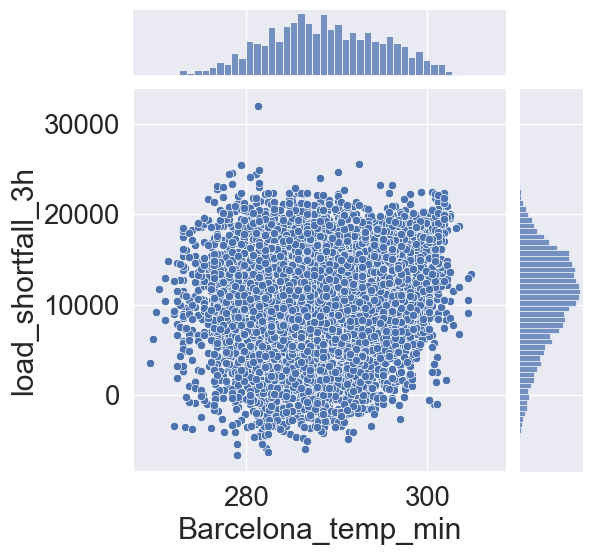

In [36]:
sns.jointplot(x = 'Barcelona_temp_min', y = 'load_shortfall_3h', data = dataframe);

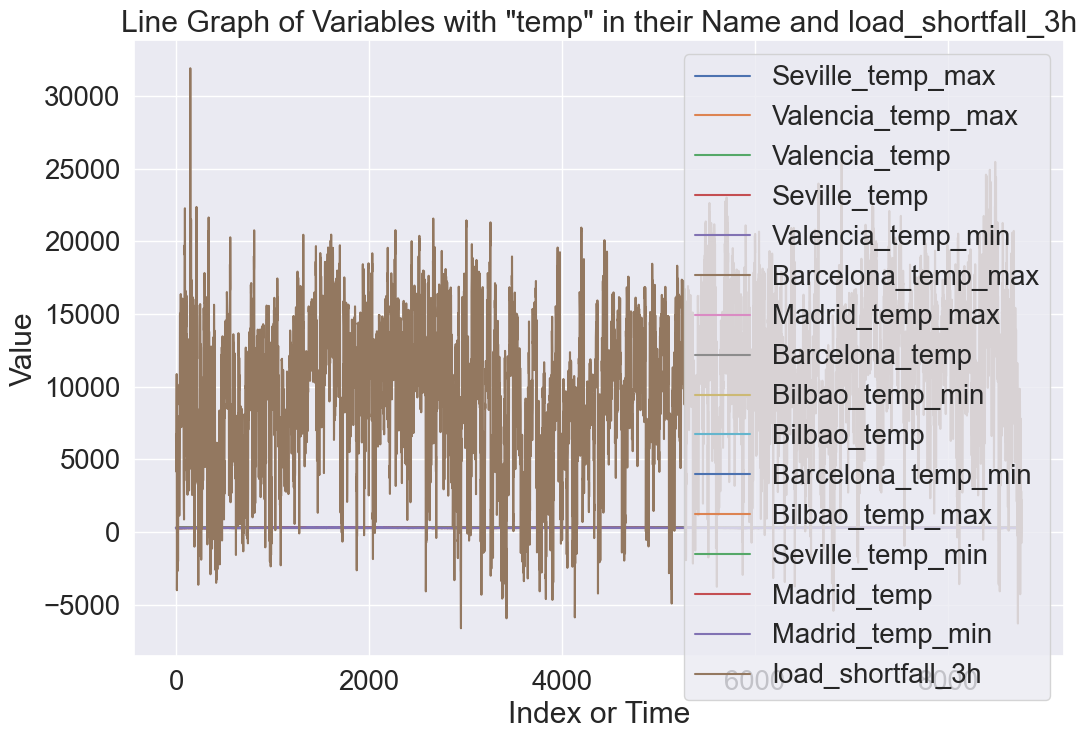

In [41]:
# Extract variables with "rain" in their name and load_shortfall_3h
rain_variables = [col for col in dataframe.columns if 'temp' in col.lower()]
rain_variables.append('load_shortfall_3h')

# Plot a line graph for each variable on the same axis
plt.figure(figsize=(12, 8))

for variable in rain_variables:
    plt.plot(dataframe[variable], label=variable)

plt.title('Line Graph of Variables with "temp" in their Name and load_shortfall_3h')
plt.xlabel('Index or Time')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

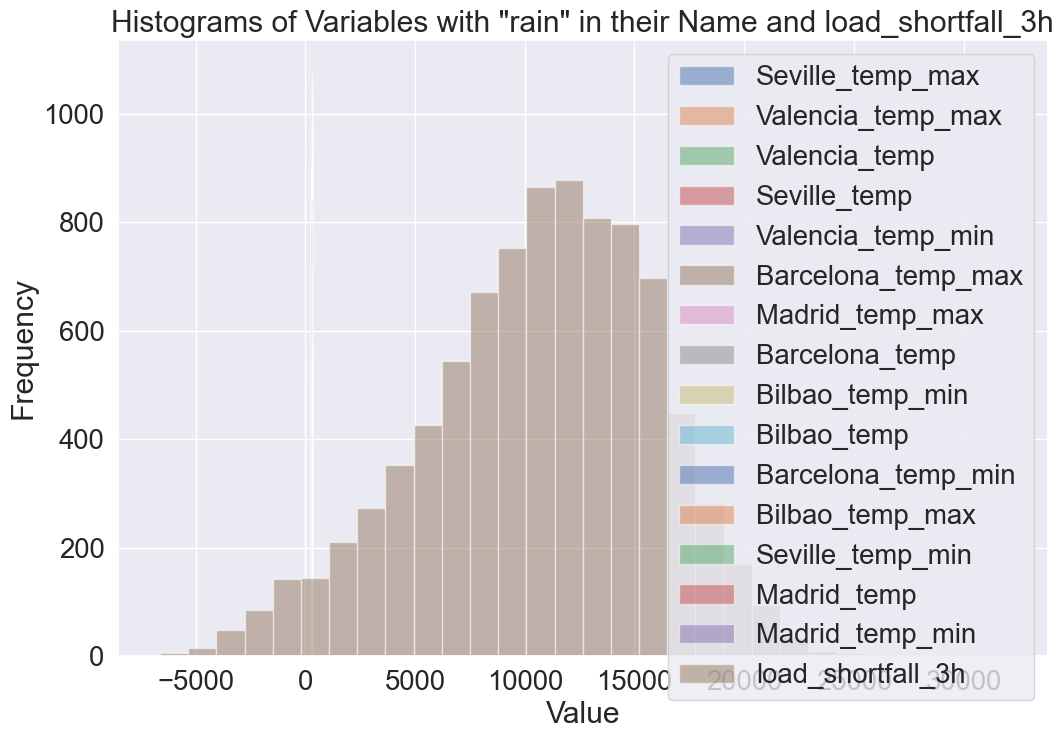

In [45]:
# Extract variables with "rain" in their name and load_shortfall_3h
rain_variables = [col for col in dataframe.columns if 'temp' in col.lower()]
rain_variables.append('load_shortfall_3h')

# Plot histograms for all variables on the same axis
plt.figure(figsize=(12, 8))

for variable in rain_variables:
    plt.hist(dataframe[variable], bins=30, alpha=0.5, label=variable)

plt.title('Histograms of Variables with "rain" in their Name and load_shortfall_3h')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

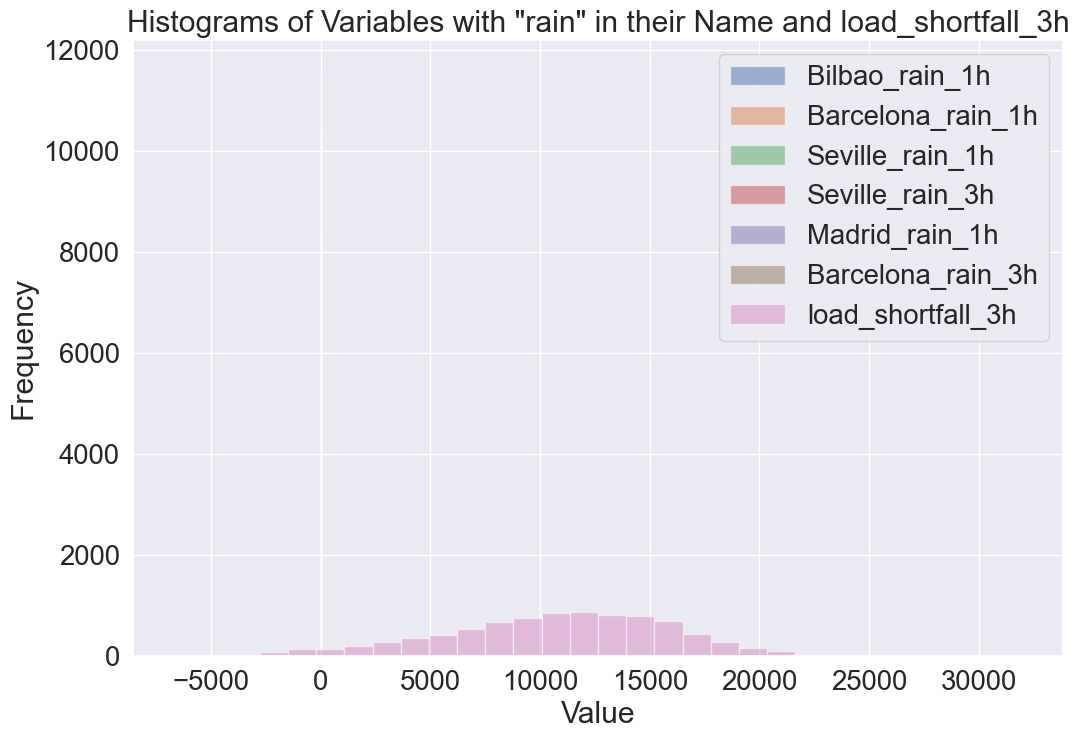

In [43]:
# Extract variables with "rain" in their name and load_shortfall_3h
rain_variables = [col for col in dataframe.columns if 'rain' in col.lower()]
rain_variables.append('load_shortfall_3h')

# Plot histograms for all variables on the same axis
plt.figure(figsize=(12, 8))

for variable in rain_variables:
    plt.hist(dataframe[variable], bins=30, alpha=0.5, label=variable)

plt.title('Histograms of Variables with "rain" in their Name and load_shortfall_3h')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [34]:
dfm = dataframe.copy()

In [35]:
dfm.shape

(11683, 52)

In [36]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:

y_name = dfm[:len(df_train)][['load_shortfall_3h']]
X_names = dfm[:len(df_train)].drop('load_shortfall_3h', axis=1)


In [37]:
X_names.columns

Index(['Year', 'Month', 'Day', 'Hour', 'TimeNumeric', 'Madrid_wind_speed',
       'Valencia_wind_deg', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_pressure',
       'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure',
       'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h',
       'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id',
       'Bilbao_pressure', 'Seville_weather_id', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
       'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp',
       'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max',
       'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min'

- Using <b>StandardScaler from the sklearn.preprocessing</b> to standardize the features in a dataset (X_names). The StandardScaler standardizes features by removing the mean and scaling them to unit variance.

- <b>StandardScaler()</b> is instantiated to create a scaler object.
- <b>fit_transform</b> is then used to both fit the scaler to the data and transform the data in one step.
- This process will standardize each feature separately by subtracting the mean and scaling to unit variance. After scaling, each feature will have a mean of 0 and a standard deviation of 1.

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_names)

In [39]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    #p_val = round(pearsonr(dataframe[col], dataframe['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col]}

df_cp = pd.DataFrame(dict_cp).T
df_cp

Correlation_Coefficient
Valencia_temp_min                    0.201863
Month                                0.199048
Barcelona_temp_min                   0.195984
Madrid_temp                          0.186036
Barcelona_temp                       0.182673
Madrid_temp_max                      0.182548
Bilbao_temp_max                      0.180934
Bilbao_temp                          0.176411
Madrid_temp_min                      0.174744
Seville_temp_min                     0.174718
Valencia_temp                        0.173225
Bilbao_temp_min                      0.172920
Barcelona_temp_max                   0.164734
Seville_temp                         0.159343
Bilbao_weather_id                    0.145875
Valencia_temp_max                    0.144270
Hour                                 0.139285
TimeNumeric                          0.139285
Year                                 0.131324
Seville_temp_max                     0.109834
Madrid_pressure                      0.092638
Day                                  0.092116
Valencia_pressure                    0.090405
Barcelona_weather_id                 0.063868
Seville_weather_id                   0.061104
Valencia_humidity                    0.043140
Bilbao_pressure                      0.039052
Madrid_weather_id                    0.030868
Valencia_snow_3h                    -0.021633
Barcelona_rain_3h                   -0.024720
Madrid_rain_1h                      -0.027159
Seville_pressure                    -0.030434
Seville_rain_1h                     -0.031572
Bilbao_snow_3h                      -0.031721
Seville_rain_3h                     -0.032945
Barcelona_pressure                  -0.034385
Seville_wind_speed                  -0.048433
Barcelona_rain_1h                   -0.056633
Bilbao_wind_speed                   -0.081602
Madrid_clouds_all                   -0.081623
Seville_clouds_all                  -0.091804
Barcelona_wind_speed                -0.103633
Barcelona_wind_deg                  -0.116133
Bilbao_wind_deg                     -0.120800
Bilbao_clouds_all                   -0.127293
Valencia_wind_speed                 -0.142791
Madrid_humidity                     -0.150536
Madrid_wind_speed                   -0.150981
Bilbao_rain_1h                      -0.152510
Seville_humidity                    -0.167290
Valencia_wind_deg                   -0.188674

Let's keep only the variables that have a significant correlation with the dependent variable. We'll put them into an independent variable DataFrame X

However, we also need to look for predictor variable pairs which have a high correlation with each other to avoid autocorrelation.

In [40]:
# Create the correlation matrix
corr = X_names.corr()

# Find rows and columnd where correlation coefficients > 0.1 or <-0.1
corr[np.abs(corr) > 0.1]

Year     Month  Day      Hour  TimeNumeric  \
Year                  1.000000       NaN  NaN       NaN          NaN   
Month                      NaN  1.000000  NaN       NaN          NaN   
Day                        NaN       NaN  1.0       NaN          NaN   
Hour                       NaN       NaN  NaN  1.000000     1.000000   
TimeNumeric                NaN       NaN  NaN  1.000000     1.000000   
Madrid_wind_speed          NaN -0.237445  NaN  0.186228     0.186228   
Valencia_wind_deg          NaN -0.140195  NaN -0.138415    -0.138415   
Bilbao_rain_1h       -0.200747 -0.188274  NaN       NaN          NaN   
Valencia_wind_speed        NaN -0.237156  NaN  0.204103     0.204103   
Seville_humidity           NaN -0.111622  NaN -0.424982    -0.424982   
Madrid_humidity            NaN       NaN  NaN -0.307872    -0.307872   
Bilbao_clouds_all          NaN -0.117452  NaN       NaN          NaN   
Bilbao_wind_speed          NaN       NaN  NaN  0.197848     0.197848   
Seville_clouds_all         NaN -0.170345  NaN       NaN          NaN   
Bilbao_wind_deg      -0.104647 -0.174941  NaN  0.110457     0.110457   
Barcelona_wind_speed -0.188756 -0.122221  NaN  0.182538     0.182538   
Barcelona_wind_deg   -0.155275       NaN  NaN -0.192949    -0.192949   
Madrid_clouds_all          NaN -0.118792  NaN       NaN          NaN   
Seville_wind_speed         NaN -0.122624  NaN  0.251261     0.251261   
Barcelona_rain_1h          NaN       NaN  NaN       NaN          NaN   
Seville_pressure     -0.126372       NaN  NaN       NaN          NaN   
Seville_rain_1h            NaN       NaN  NaN       NaN          NaN   
Bilbao_snow_3h             NaN       NaN  NaN       NaN          NaN   
Barcelona_pressure         NaN       NaN  NaN       NaN          NaN   
Seville_rain_3h            NaN       NaN  NaN       NaN          NaN   
Madrid_rain_1h             NaN       NaN  NaN       NaN          NaN   
Barcelona_rain_3h          NaN       NaN  NaN       NaN          NaN   
Valencia_snow_3h           NaN       NaN  NaN       NaN          NaN   
Madrid_weather_id          NaN       NaN  NaN       NaN          NaN   
Barcelona_weather_id       NaN       NaN  NaN       NaN          NaN   
Bilbao_pressure            NaN       NaN  NaN       NaN          NaN   
Seville_weather_id         NaN  0.100786  NaN       NaN          NaN   
Valencia_pressure     0.210942       NaN  NaN       NaN          NaN   
Seville_temp_max           NaN  0.193143  NaN  0.235839     0.235839   
Madrid_pressure       0.315294  0.269350  NaN       NaN          NaN   
Valencia_temp_max          NaN  0.210184  NaN  0.257827     0.257827   
Valencia_temp              NaN  0.216464  NaN  0.280332     0.280332   
Bilbao_weather_id     0.154810  0.141738  NaN       NaN          NaN   
Seville_temp               NaN  0.213623  NaN  0.328541     0.328541   
Valencia_humidity          NaN  0.162713  NaN -0.351680    -0.351680   
Valencia_temp_min     0.119432  0.220501  NaN  0.296154     0.296154   
Barcelona_temp_max         NaN  0.230539  NaN  0.187865     0.187865   
Madrid_temp_max            NaN  0.191223  NaN  0.282868     0.282868   
Barcelona_temp             NaN  0.203184  NaN  0.217222     0.217222   
Bilbao_temp_min            NaN  0.195889  NaN  0.274208     0.274208   
Bilbao_temp                NaN  0.239443  NaN  0.268754     0.268754   
Barcelona_temp_min         NaN  0.159629  NaN  0.242716     0.242716   
Bilbao_temp_max            NaN  0.277963  NaN  0.256644     0.256644   
Seville_temp_min           NaN  0.205000  NaN  0.358350     0.358350   
Madrid_temp                NaN  0.182860  NaN  0.290699     0.290699   
Madrid_temp_min            NaN  0.157368  NaN  0.270623     0.270623   

                      Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  \
Year                                NaN                NaN       -0.200747   
Month                         -0.237445          -0.140195       -0.188274   
Day                                 NaN        

Instead of looking at the whole correlation matrix, it might be easier to isolate the sections of the correlation matrix to where the off-diagonal correlations are high:

In [41]:
corr.shape

(51, 51)

- The code below helps with identifying and extracting highly correlated pairs of features based on a correlation threshold (0.1 in this case). The resulting output is the subset of the correlation matrix that satisfies the condition. 
- It can also be useful in identifying multicollinearity in the dataset, where certain features are highly correlated with each other.

In [42]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.1 or <-0.1
corr = X_names.corr()
r, c = np.where(np.abs(corr) > 0.1)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

Bilbao_rain_1h  Bilbao_wind_deg  Barcelona_wind_speed  \
Year                  -0.200747        -0.104647             -0.188756   
Year                  -0.200747        -0.104647             -0.188756   
Year                  -0.200747        -0.104647             -0.188756   
Year                  -0.200747        -0.104647             -0.188756   
Year                  -0.200747        -0.104647             -0.188756   
...                         ...              ...                   ...   
Madrid_temp_min       -0.116431         0.048397              0.084679   
Madrid_temp_min       -0.116431         0.048397              0.084679   
Madrid_temp_min       -0.116431         0.048397              0.084679   
Madrid_temp_min       -0.116431         0.048397              0.084679   
Madrid_temp_min       -0.116431         0.048397              0.084679   

                 Barcelona_wind_deg  Seville_pressure  Valencia_pressure  \
Year                      -0.155275         -0.126372           0.210942   
Year                      -0.155275         -0.126372           0.210942   
Year                      -0.155275         -0.126372           0.210942   
Year                      -0.155275         -0.126372           0.210942   
Year                      -0.155275         -0.126372           0.210942   
...                             ...               ...                ...   
Madrid_temp_min           -0.211010         -0.375249          -0.047547   
Madrid_temp_min           -0.211010         -0.375249          -0.047547   
Madrid_temp_min           -0.211010         -0.375249          -0.047547   
Madrid_temp_min           -0.211010         -0.375249          -0.047547   
Madrid_temp_min           -0.211010         -0.375249          -0.047547   

                 Madrid_pressure  Bilbao_weather_id  Valencia_temp_min  \
Year                    0.315294           0.154810           0.119432   
Year                    0.315294           0.154810           0.119432   
Year                    0.315294           0.154810           0.119432   
Year                    0.315294           0.154810           0.119432   
Year                    0.315294           0.154810           0.119432   
...                          ...                ...                ...   
Madrid_temp_min         0.014089           0.124199           0.860347   
Madrid_temp_min         0.014089           0.124199           0.860347   
Madrid_temp_min         0.014089           0.124199           0.860347   
Madrid_temp_min         0.014089           0.124199           0.860347   
Madrid_temp_min         0.014089           0.124199           0.860347   

                 Madrid_wind_speed  ...  Valencia_temp_min  \
Year                     -0.031553  ...           0.119432   
Year                     -0.031553  ...           0.119432   
Year                     -0.031553  ...           0.119432   
Year                     -0.031553  ...           0.119432   
Year                     -0.031553  ...           0.119432   
...                            ...  ...                ...   
Madrid_temp_min           0.098138  ...           0.860347   
Madrid_temp_min           0.098138  ...           0.860347   
Madrid_temp_min           0.098138  ...           0.860347   
Madrid_temp_min           0.098138  ...           0.860347   
Madrid_temp_min           0.098138  ...           0.860347   

                 Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  \
Year                      -0.030199         0.032496        0.001255   
Year                      -0.030199         0.032496        0.001255   
Year                      -0.030199         0.032496        0.001255   
Year                      -0.030199         0.032496        0.001255   
Year                      -0.030199         0.032496        0.001255   
...                             ...              ...             ...   
Madrid_temp_min            0.847888         0.939147        0.868222   
Madri

In [43]:
corr.columns

Index(['Year', 'Month', 'Day', 'Hour', 'TimeNumeric', 'Madrid_wind_speed',
       'Valencia_wind_deg', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_pressure',
       'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure',
       'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h',
       'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id',
       'Bilbao_pressure', 'Seville_weather_id', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
       'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp',
       'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max',
       'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min'

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

Model prediction of Loan Size

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

<b>Preprocess data</b><br>
First we need to make sure that all models are trained and tested on the same data.

<b>Fit models</b><br>
Next we instantiate and fit our models
- When fitting models, it involves training the model on a dataset to learn patterns and relationships within the data.

In [45]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_name,
                                                    test_size=0.25,
                                                    random_state=55)

In [46]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

prediction1 = model_lr.predict(X_test)

In [47]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, y_train)

prediction2 = model_RFR.predict(X_test)

In [48]:
from sklearn.ensemble import RandomForestRegressor

model_RFR_Selection = RandomForestRegressor()
model_RFR_Selection.fit(X_train, y_train)

feature_importances = model_RFR_Selection.feature_importances_

In [49]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(model_RFR_Selection, prefit=True, threshold=-np.inf)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [50]:
model_selected = RandomForestRegressor()
model_selected.fit(X_train_selected, y_train)

RandomForestRegressor()

In [51]:
prediction5 = model_selected.predict(X_test)

In [52]:
from sklearn.tree import DecisionTreeRegressor

model_DTR = DecisionTreeRegressor(random_state=2)
model_DTR.fit(X_train, y_train)

prediction3 = model_DTR.predict(X_test)

In [53]:
from sklearn.svm import SVR

model_SVR = SVR(kernel='linear', gamma='auto')
model_SVR.fit(X_train, y_train)

prediction4 = model_SVR.predict(X_test)

In [54]:
from sklearn.linear_model import HuberRegressor

model_HR = HuberRegressor()
model_HR.fit(X_train, y_train)

prediction6 = model_HR.predict(X_test)

In [55]:
from sklearn.linear_model import OrthogonalMatchingPursuit

model_OMP = OrthogonalMatchingPursuit()
model_OMP.fit(X_train, y_train)

prediction7 = model_OMP.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

 <b>Compare model performance</b> 

 <b>Choose best model and motivate why it is the best choice</b>

In [58]:
from sklearn import metrics
import math

In [59]:
def MSE(y_test, y_predict):
    return metrics.mean_squared_error(y_test, y_predict)

In [60]:
print("Linear Regression: ", MSE(y_test, prediction1))
print("Random Forest: ", MSE(y_test, prediction2))
print("Decision Tree: ", MSE(y_test, prediction3))
print("HuberRegressor: ", MSE(y_test, prediction6))
print("OrthogonalMatchingPursuit: ", MSE(y_test, prediction7))

Linear Regression:  21874413.644454345
Random Forest:  9456492.662925087
Decision Tree:  18379362.87141525
HuberRegressor:  22041727.23835294
OrthogonalMatchingPursuit:  23592932.126959164


In [61]:
def RMSE(y_test, y_predict):
    return math.sqrt(metrics.mean_squared_error(y_test, y_predict))

In [62]:
print("Random Forest:\t\t", RMSE(y_test, prediction2))
print("RF_Selection:\t\t", RMSE(y_test, prediction5))
print("Decision Tree: \t\t", RMSE(y_test, prediction3))
print("Linear Regression:\t", RMSE(y_test, prediction1))
print("HuberRegressor: \t", RMSE(y_test, prediction6))
print("OrthogonalMatchingPursuit:", RMSE(y_test, prediction7))

Random Forest:		 3075.141080166093
RF_Selection:		 3061.913179662255
Decision Tree: 		 4287.11591532294
Linear Regression:	 4677.009049002829
HuberRegressor: 	 4694.861791187568
OrthogonalMatchingPursuit: 4857.255616802472


In [63]:
from sklearn.metrics import r2_score

In [64]:
print("Random Forest:\t\t", round((r2_score(y_test, prediction2))*100),"%")
print("RF_Selection:\t\t", round((r2_score(y_test, prediction5))*100),"%")
print("Decision Tree:\t\t", round((r2_score(y_test, prediction3))*100),"%")
print("Linear Regression:\t", round((r2_score(y_test, prediction1))*100),"%")
print("HuberRegressor:\t\t", round((r2_score(y_test, prediction6))*100),"%")
print("SVR:\t\t\t", round((r2_score(y_test, prediction4))*100),"%")
print("OrthogonalMatchingPursuit:\t", round((r2_score(y_test, prediction7))*100),"%")

Random Forest:		 65 %
RF_Selection:		 65 %
Decision Tree:		 32 %
Linear Regression:	 19 %
HuberRegressor:		 18 %
SVR:			 16 %
OrthogonalMatchingPursuit:	 13 %


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

SUMBISSION

In [65]:
X_train = dfm[:len(df_train)].drop('load_shortfall_3h', axis=1)
X_test = dfm[len(df_train):].drop('load_shortfall_3h', axis=1)

In [66]:
model_RFR.fit(X_train, y_name)

prediction2 = model_RFR.predict(X_test)

<b>This summary output is valuable for understanding the performance and statistical significance of your regression model.</b>

The fitted summary will display information on these: 

- <b>Coefficients</b>: The estimated coefficients for each independent variable.
- <b>P-values</b>: The p-values associated with each coefficient, indicating whether the variable is statistically significant in predicting the dependent variable.
- <b>R-squared</b>: The proportion of variance in the dependent variable explained by the independent variables.
- <b>F-statistic</b>: A measure of overall model fit.
- <b>Residuals</b>: Information about the residuals, such as mean, skewness, and kurtosis.



In [67]:
import statsmodels.api as sm

model_RFR = sm.OLS(y_name, X_names)
fitted = model_RFR.fit()

print(fitted.summary())

                                 OLS Regression Results                                
Dep. Variable:      load_shortfall_3h   R-squared (uncentered):                   0.842
Model:                            OLS   Adj. R-squared (uncentered):              0.841
Method:                 Least Squares   F-statistic:                              926.9
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                        0.00
Time:                        23:29:56   Log-Likelihood:                         -86577.
No. Observations:                8763   AIC:                                  1.733e+05
Df Residuals:                    8713   BIC:                                  1.736e+05
Df Model:                          50                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [68]:
daf=pd.DataFrame(prediction2, columns=['load_shortfall_3h'])
daf.tail()

load_shortfall_3h
2915       15124.790000
2916       13171.136667
2917       12798.660000
2918       13866.266667
2919       15834.663333

We create a DataFrame (output) containing the 'time' column from the testing set (df_test). 
Then, it joins this DataFrame with the previously created DataFrame (daf) containing the predicted values for 'load_shortfall_3h'. Finally, it exports the resulting DataFrame to a CSV file named "submission.csv" without including the index. 
This CSV file is used as a submission file for the competition. It includes the 'time' column and the corresponding predicted values for 'load_shortfall_3h'.

In [69]:
output = pd.DataFrame({'time':df_test['time']})
submission = output.join(daf)
submission.to_csv("submission.csv", index=False)

In [70]:
submission

time  load_shortfall_3h
0     2018-01-01 00:00:00       10264.893333
1     2018-01-01 03:00:00        7594.960000
2     2018-01-01 06:00:00        6983.970000
3     2018-01-01 09:00:00       10259.736667
4     2018-01-01 12:00:00       11177.123333
...                   ...                ...
2915  2018-12-31 09:00:00       15124.790000
2916  2018-12-31 12:00:00       13171.136667
2917  2018-12-31 15:00:00       12798.660000
2918  2018-12-31 18:00:00       13866.266667
2919  2018-12-31 21:00:00       15834.663333

[2920 rows x 2 columns]

plt.scatter(y_test,prediction2)
plt.plot(x_test,y_test,"r")
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

In [71]:
import pickle

model_save_path = "mlr_model.pkl"
with open(model_save_path, 'wb') as file:
    pickle.dump(model_DTR,file)